In [ ]:
# Part I:
# 1) Join each of the tables to the corresponding feature class. Find a common field to join on.
# 2) Add a new field named mapunit to each joined feature class and calculate the values for all features as the
# map unit ID of the feature class. The map unit ID is the suffix of the layer name (e.g., co641).
# 3) Merge the 9 feature classes into a new feature class.
# 4) Intersect the merged feature class with the watershed boundaries

import os
import geopandas as gpd
import pandas as pd
import fiona

import fiona

layers = fiona.listlayers('./lab1.gpkg')
#print (layers)
polygons = [] 
tables = []
df = []

for layer_name in layers:
    if layer_name.startswith('soilmu'):
        polygons.append(layer_name)

for layer_name in layers:
    if layer_name.startswith('muaggatt'):
        tables.append(layer_name)
    
for spatial in polygons:
    layer_id = spatial[-5:]
    for table in tables:
        if table[-5:] == layer_id:
            map_layer = gpd.read_file('./lab1.gpkg', layer = spatial)
            data_layer = gpd.read_file('./lab1.gpkg', layer = table).rename(columns=str.upper)
            joined_layer = map_layer.merge(data_layer, on = 'MUSYM')
            joined_layer ['mapunit'] = spatial[-5:]            
            df.append(joined_layer)
print(df)
new_df = pd.concat(df)

watershed_layer = gpd.read_file('./lab1.gpkg', layer = 'wbdhu8_lab1')
denver_overlay = gpd.overlay(new_df, watershed_layer, how = 'intersection')  

#denver_overlay.plot()


In [ ]:
# Part II:
# Find the number of features in the resulting intersected feature class that correspond to each watershed.
# Report these two numbers in a print statement at the end of your script. Hint: Look at the groupby function
# from pandas, which column should you group by?

denver_overlay.groupby(by=['NAME']).size()

In [13]:
print(type(joined_layer))

<class 'geopandas.geodataframe.GeoDataFrame'>


<AxesSubplot:>

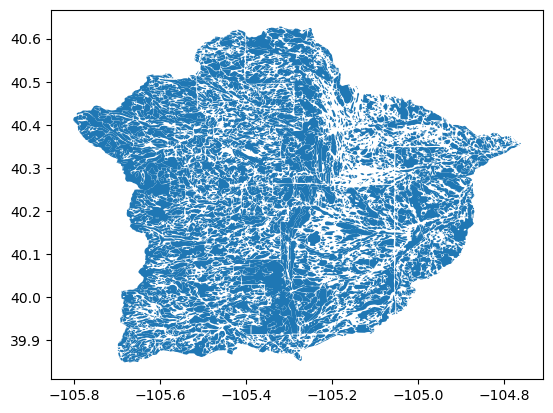

In [2]:
denver_overlay.plot()